# Clustering and Fitting on Churn Data

https://www.kaggle.com/datasets/pentakrishnakishore/bank-customer-churn-data?select=churn_prediction.csv

## Import Libraries and Data

In [1]:
# import libraires

import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [2]:
colour = ['#A79277', '#D1BB9E', '#EAD8C0', '#FFF2E1']

### Load Data

In [3]:
# Load data
def loading_data(path):
  """
  Load the data set from the given path
  """
  data = pd.read_csv(path)
  return data

In [4]:
churn_data = loading_data('churn.csv')

## Analysis of Data

In [5]:
churn_data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [6]:
# Function to analyse information and missing value of data
def stats_analysis1(df):
  """
  Analyses Data Information and Missing Count
  """
  print("Data Information")
  print()
  df.info()
  print()
  print("-------------------------------------------------------------")
  print()
  print("Data Missing Value Count")
  print()
  print(df.isnull().sum())

In [7]:
stats_analysis1(churn_data)

Data Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthl

In [8]:
# Function to analyse statsistical depth
def stats_analysis2(df):
    """
    Analyses Data Statistical Depth - such as basic descriptive statistics, skewness and kurtosis.
    """
    print("Data Statistical Depth")
    print("----------------------------------------------------------------------")

    num_df = df.select_dtypes(include=['number'])
    # Basic descriptive statistics
    print("\nBasic Descriptive Statistics:")
    print("*********************************")
    print(num_df.describe())
    print("----------------------------------------------------------------------")
    #  Skewness and Kurtosis
    print("\nSkewness:")
    print("*********************************")
    print(num_df.skew())
    print("----------------------------------------------------------------------")
    print("\nKurtosis:")
    print("*********************************")
    print(num_df.kurt())


In [9]:
stats_analysis2(churn_data)

Data Statistical Depth
----------------------------------------------------------------------

Basic Descriptive Statistics:
*********************************
        customer_id       vintage           age    dependents          city  \
count  28382.000000  28382.000000  28382.000000  25919.000000  27579.000000   
mean   15143.508667   2091.144105     48.208336      0.347236    796.109576   
std     8746.454456    272.676775     17.807163      0.997661    432.872102   
min        1.000000     73.000000      1.000000      0.000000      0.000000   
25%     7557.250000   1958.000000     36.000000      0.000000    409.000000   
50%    15150.500000   2154.000000     46.000000      0.000000    834.000000   
75%    22706.750000   2292.000000     60.000000      0.000000   1096.000000   
max    30301.000000   2476.000000     90.000000     52.000000   1649.000000   

       customer_nw_category   branch_code  current_balance  \
count          28382.000000  28382.000000     2.838200e+04   
mean 

## EDA

### Plot no 1

In [10]:
def plot_1(df):
  """
  PLot the bar chart for occupation column.
  """
  # Count the occurance of each occupation
  occ_counts =  df['occupation'].value_counts()

  # Plot figure
  plot.figure(figsize=(10,6))
  occ_bars = plot.bar(
        occ_counts.index,
        occ_counts.values,
        color=colour[:len(occ_counts)],
        edgecolor='black'
    )

  # Add annotation
  for occ_bar in occ_bars:
    height = occ_bar.get_height()
    plot.text(x = occ_bar.get_x() +  occ_bar.get_width()/ 2, y = height + 0.5, s=f"{int(height)}",ha='center', va='bottom', fontsize=10)


  # Customise label and axes
  plot.xlabel('Occupation Type', fontsize=14, fontweight='bold')
  plot.ylabel("Occupation Count", fontsize=14, fontweight='bold')
  plot.title("Distribution of Occupation", fontsize=16, fontweight='bold')
  plot.xticks(fontsize=10)
  plot.yticks(fontsize=10)

  plot.grid(axis='y', alpha=0.7)

  # Show plot
  plot.show()

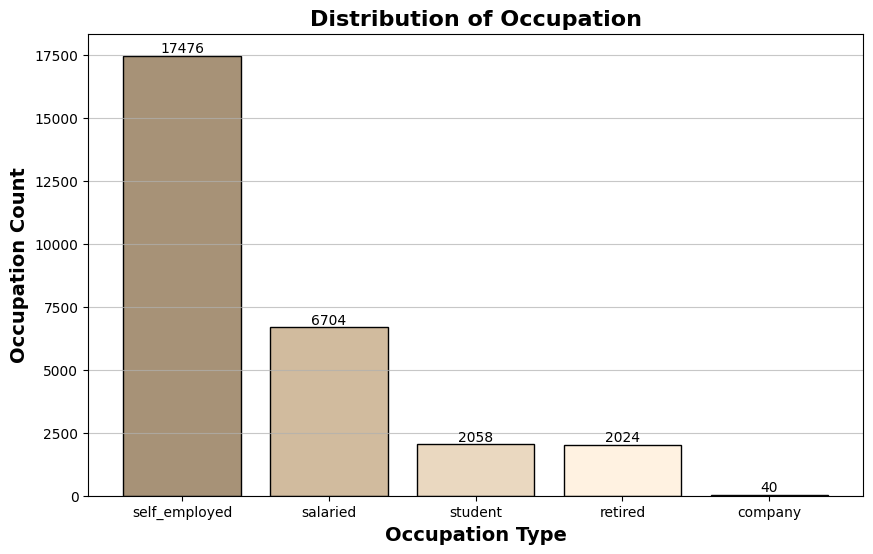

In [11]:
# Apply function
plot_1(churn_data)

The chart shows that the majority of people in the dataset are self-employed (17,476), followed by salaried individuals (6,704). The remaining categories have significantly lower counts.


### Plot no 2

In [12]:
def plot_2(df):
  """
  Plot the line plot for average monthly balance of previous quater and previous quater 2
  """
  df_filter_col = df[['average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2']].dropna()

  # Plot figure
  plot.figure(figsize=(10,6))
  plot.plot(df_filter_col.index, df_filter_col['average_monthly_balance_prevQ'], label='Previous Quater', marker='v', linestyle='-', color='#A79277')
  plot.plot(df_filter_col.index, df_filter_col['average_monthly_balance_prevQ2'], label='Previous Quater 2', marker='^', linestyle='--', color='#EAD8C0')

  # Customise label and axes
  plot.xlabel("Index", fontsize=14, fontweight='bold')
  plot.ylabel("Average Monthly Balance", fontsize=14, fontweight='bold')
  plot.title("Average Monthly Balance Comparison of Quaters", fontsize=16, fontweight='bold')
  plot.xticks(fontsize=10)
  plot.yticks(fontsize=10)
  plot.legend(fontsize=12, loc='upper right')
  plot.grid(axis='y', alpha=0.7)

  # Show plot
  plot.show()

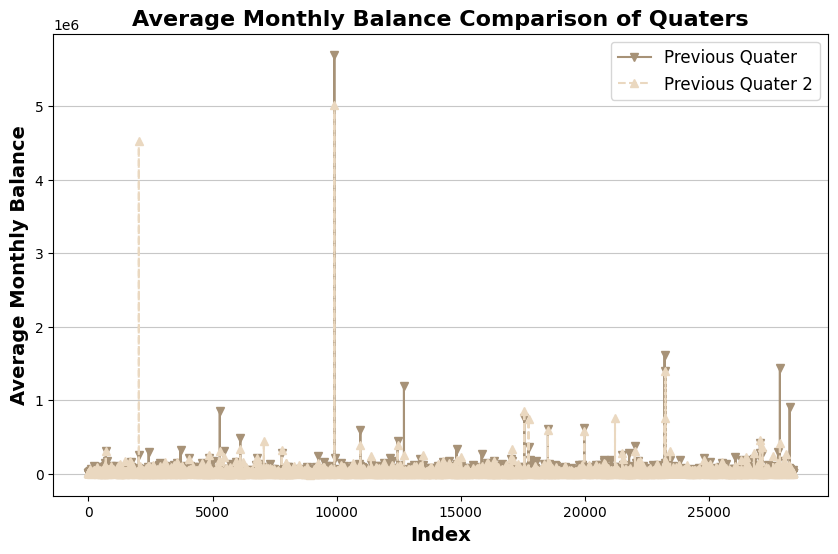

In [13]:
# Apply function
plot_2(churn_data)

The chart displays the average monthly balance for two previous quarters. The data points for both quarters are highly dispersed with numerous outliers, indicating significant variation in monthly balances across different indices.


### Plot no 3

In [14]:
def plot_3(df):
  """
  Plot the heatmap for correlation of numerical columns to identify highly correlated columns.
  """
  # Select num col
  num_df = df.select_dtypes(include=['number'])

  # Calculate the correlation
  num_corr_matrix = num_df.corr()

  # Plot heatmap
  plot.figure(figsize=(12, 10))
  sns.heatmap(num_corr_matrix, annot=True, cmap='YlOrBr', fmt='.2f', cbar=True, linewidths=0.5,
                annot_kws={'size': 10}, xticklabels=num_corr_matrix.columns, yticklabels=num_corr_matrix.columns)

  # Add title
  plot.title("Correlation Heatmap of Numerical Columns", fontsize=16, fontweight='bold')
  plot.tight_layout()

  plot.show()

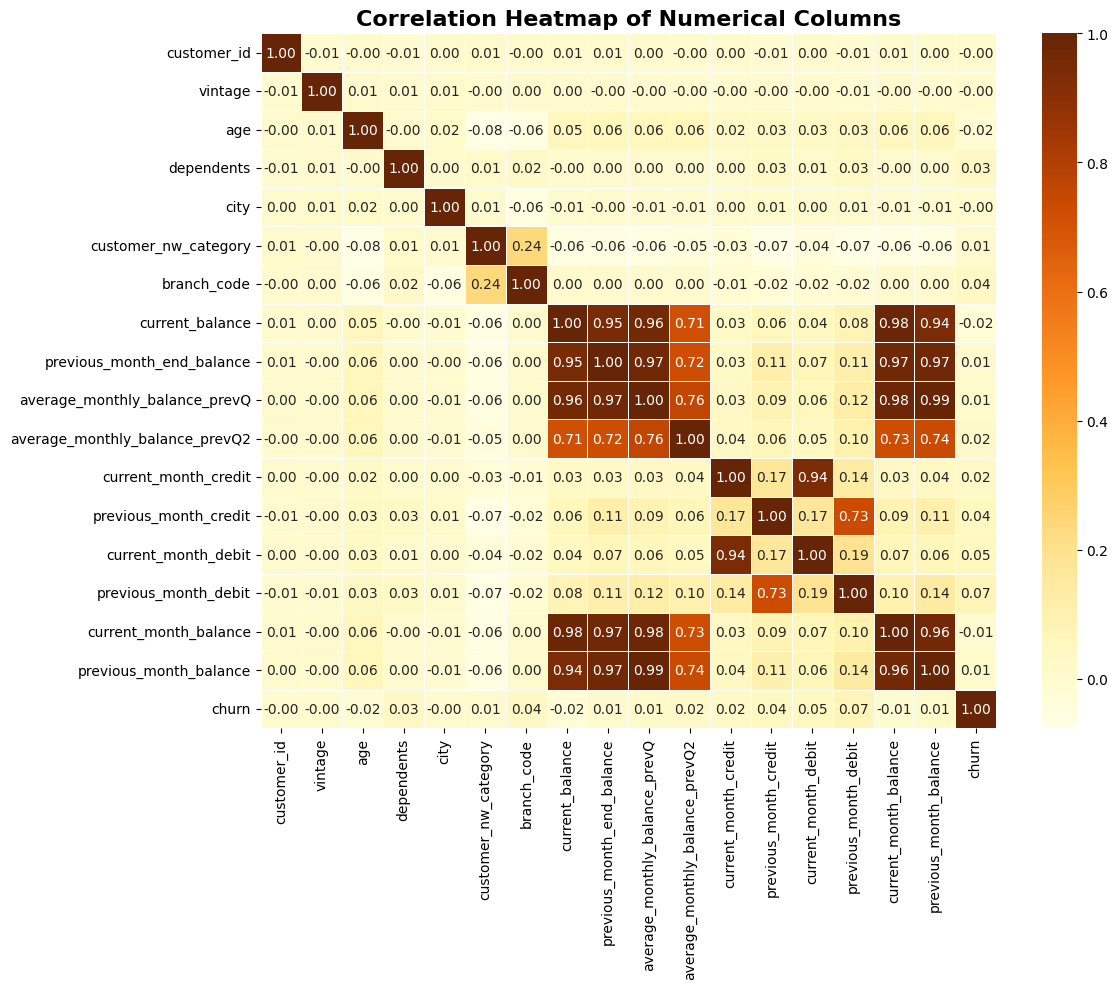

In [15]:
# Apply function
plot_3(churn_data)

The heatmap reveals a strong positive correlation between various balance-related variables, indicating that changes in one variable often lead to similar changes in others. Notably, there's a moderate negative correlation between churn and dependents, suggesting customers with dependents might be less likely to churn. Additionally, the heatmap shows a moderate positive correlation between churn and current month debit, implying that higher debit amounts might be linked to a higher churn rate.

## Data Preprocessing

In [16]:
churn_data = churn_data.drop(['customer_id', 'last_transaction'], axis=1)

### Handle Missing Values

In [17]:
# Drop Missing Rows
churn_data = churn_data.dropna()

In [18]:
churn_data.isnull().sum()

,0
vintage,0
age,0
gender,0
dependents,0
occupation,0
city,0
customer_nw_category,0
branch_code,0
current_balance,0
previous_month_end_balance,0


### Encoding Data

Encode the categorical data into numerical type.

In [19]:
# Funtion to Label Encode Gender and Occupation
def encode_feature(df, cols):
  """
  Encode the feature using LabelEncoder
  """
  le = LabelEncoder()
  for col in cols:
    df[col] = le.fit_transform(df[col])
  return df

In [20]:
churn_data = encode_feature(churn_data, ['gender', 'occupation'])

In [21]:
churn_data.head()

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,2101,66,1,0.0,3,187.0,2,755,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
2,2194,31,1,0.0,2,146.0,2,41,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
4,1579,42,1,2.0,3,1494.0,3,388,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
5,1923,42,0,0.0,3,1096.0,2,1666,15202.20,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
6,2048,72,1,0.0,1,1020.0,1,1,7006.93,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0


### Scaling

Normalise the data in range of 0 to 1.

In [22]:
def normalise_feature(df):
  """
  Normalise the feature using MinMaxScaler
  """
  scaler = MinMaxScaler()
  df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
  return df_scaled, scaler

In [23]:
churn_data, scaler = normalise_feature(churn_data)

In [24]:
churn_data.head()

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,0.843945,0.730337,1.0,0.000000,0.75,0.113402,0.5,0.157708,0.004959,0.003285,0.000021,0.012769,1.548512e-08,8.044683e-08,2.487609e-08,1.343546e-07,0.003447,0.004724,0.0
1,0.882647,0.337079,1.0,0.000000,0.50,0.088539,0.5,0.008366,0.006707,0.006393,0.002492,0.013741,4.890037e-08,2.540426e-07,7.916775e-04,1.833021e-04,0.005978,0.007297,0.0
2,0.626717,0.460674,1.0,0.038462,0.75,0.906004,1.0,0.080945,0.004581,0.003244,0.000154,0.013069,2.608020e-08,3.025648e-04,7.706481e-05,1.087601e-03,0.003232,0.004879,1.0
3,0.769871,0.460674,0.0,0.000000,0.75,0.664645,0.5,0.348254,0.014748,0.013702,0.009865,0.021552,2.852522e-08,1.481915e-07,1.122684e-04,2.022815e-04,0.013620,0.014620,0.0
4,0.821889,0.797753,1.0,0.000000,0.25,0.618557,0.0,0.000000,0.008911,0.007748,0.004603,0.019727,5.134539e-08,2.667448e-07,1.701564e-04,3.106066e-04,0.007455,0.009210,0.0


## Clustering and Fitting

### Elbow Plot

In [25]:
def plot_4(df, min_clusters=2, max_clusters=10):
    """
    Plot the elbow curve plot to get the optimal number of clusters.
    """
    # Range for number of clusters
    range_n_clusters = list(range(min_clusters, max_clusters + 1))

    # Store inertia values
    inertias = []

    # Calculate inertia
    for n_clusters in range_n_clusters:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(df)
        inertias.append(kmeans.inertia_)

    # Plot the figure
    plot.figure(figsize=(12, 10))
    plot.plot(range_n_clusters, inertias, marker='v', color='#A79277')

    #  Customise label and axes
    plot.title('Elbow Method for Finding Optimal Number of Clusters', fontsize=16, fontweight='bold')
    plot.xlabel('Number of Clusters', fontsize=14, fontweight='bold')
    plot.ylabel('Inertia', fontsize=14, fontweight='bold')
    plot.tick_params(axis='both', labelsize=12)
    plot.grid(axis='y', alpha=0.7)

    # Show plot
    plot.show()

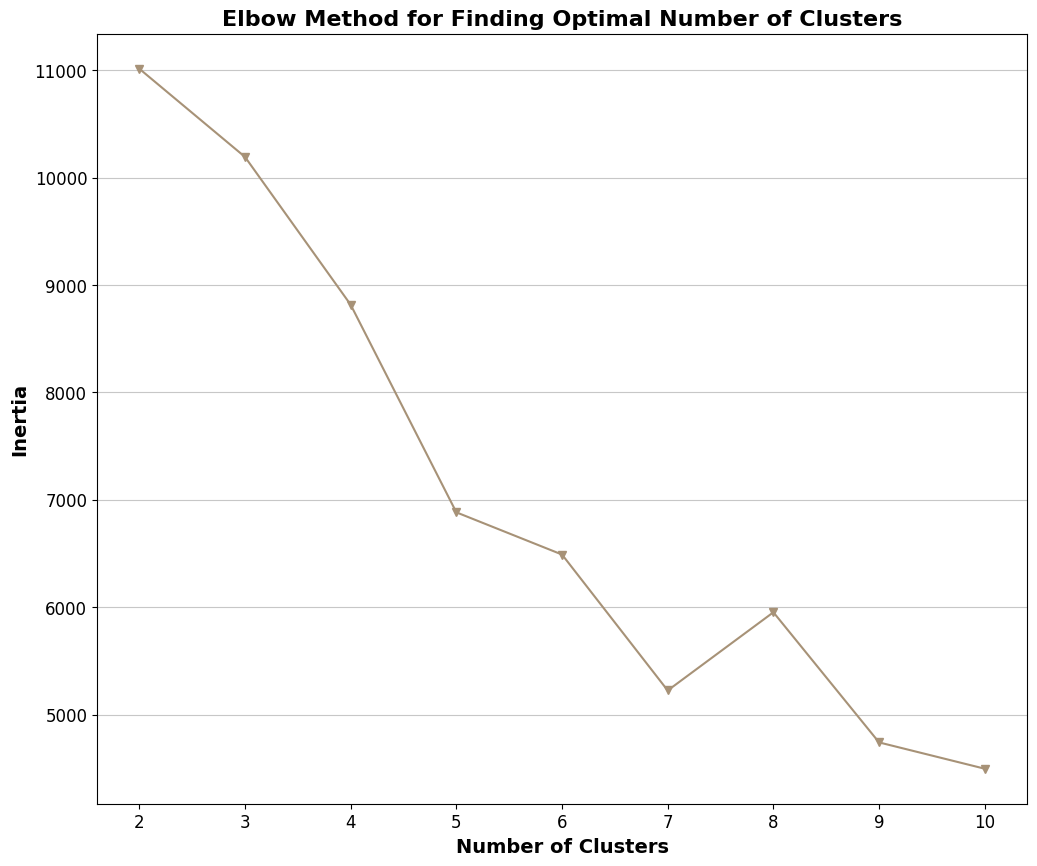

In [26]:
plot_4(churn_data)

The elbow plot shows that the optimal number of clusters is likely 4.

In [27]:
churn_data.head()

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,0.843945,0.730337,1.0,0.000000,0.75,0.113402,0.5,0.157708,0.004959,0.003285,0.000021,0.012769,1.548512e-08,8.044683e-08,2.487609e-08,1.343546e-07,0.003447,0.004724,0.0
1,0.882647,0.337079,1.0,0.000000,0.50,0.088539,0.5,0.008366,0.006707,0.006393,0.002492,0.013741,4.890037e-08,2.540426e-07,7.916775e-04,1.833021e-04,0.005978,0.007297,0.0
2,0.626717,0.460674,1.0,0.038462,0.75,0.906004,1.0,0.080945,0.004581,0.003244,0.000154,0.013069,2.608020e-08,3.025648e-04,7.706481e-05,1.087601e-03,0.003232,0.004879,1.0
3,0.769871,0.460674,0.0,0.000000,0.75,0.664645,0.5,0.348254,0.014748,0.013702,0.009865,0.021552,2.852522e-08,1.481915e-07,1.122684e-04,2.022815e-04,0.013620,0.014620,0.0
4,0.821889,0.797753,1.0,0.000000,0.25,0.618557,0.0,0.000000,0.008911,0.007748,0.004603,0.019727,5.134539e-08,2.667448e-07,1.701564e-04,3.106066e-04,0.007455,0.009210,0.0


### Apply K-Means

K-means clustering is an unsupervised learning algorithm that partitions data into
k
k clusters by assigning each data point to the cluster with the nearest centroid, iteratively updating the centroids until convergence.

In [28]:
def make_cluster(df, selected_col):
  """
  Make cluster and find cluster center using K-Means for seleted columns
  """
  # Get selected column
  selected_data = df[selected_col]
  # Initialise K-Means
  kmeans = KMeans(n_clusters=4, random_state=42)
  # Make cluster col and get cluster center baseed on selected col
  df['cluster'] = kmeans.fit_predict(selected_data)
  cluster_centers = kmeans.cluster_centers_
  return df, cluster_centers

In [29]:
# Select column to be used
selected_col = ['age',  'current_balance']

In [30]:
# Apply function
cluster_churn_data, cluster_centers  = make_cluster(churn_data, selected_col)


In [31]:
cluster_churn_data.head()

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,cluster
0,0.843945,0.730337,1.0,0.000000,0.75,0.113402,0.5,0.157708,0.004959,0.003285,0.000021,0.012769,1.548512e-08,8.044683e-08,2.487609e-08,1.343546e-07,0.003447,0.004724,0.0,2
1,0.882647,0.337079,1.0,0.000000,0.50,0.088539,0.5,0.008366,0.006707,0.006393,0.002492,0.013741,4.890037e-08,2.540426e-07,7.916775e-04,1.833021e-04,0.005978,0.007297,0.0,3
2,0.626717,0.460674,1.0,0.038462,0.75,0.906004,1.0,0.080945,0.004581,0.003244,0.000154,0.013069,2.608020e-08,3.025648e-04,7.706481e-05,1.087601e-03,0.003232,0.004879,1.0,1
3,0.769871,0.460674,0.0,0.000000,0.75,0.664645,0.5,0.348254,0.014748,0.013702,0.009865,0.021552,2.852522e-08,1.481915e-07,1.122684e-04,2.022815e-04,0.013620,0.014620,0.0,1
4,0.821889,0.797753,1.0,0.000000,0.25,0.618557,0.0,0.000000,0.008911,0.007748,0.004603,0.019727,5.134539e-08,2.667448e-07,1.701564e-04,3.106066e-04,0.007455,0.009210,0.0,2


In [32]:
# Inverse transform the sacle back the data
cluster_data_scale_back = pd.DataFrame(
    scaler.inverse_transform(cluster_churn_data.drop('cluster', axis=1)),
    columns=cluster_churn_data.columns[:-1]
)

# Add the 'cluster' column back
cluster_data_scale_back['cluster'] = cluster_churn_data['cluster']

# View the original data
cluster_data_scale_back.head()

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,cluster
0,2101.0,66.0,1.0,0.0,3.0,187.0,2.0,755.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0.0,2
1,2194.0,31.0,1.0,0.0,2.0,146.0,2.0,41.0,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0.0,3
2,1579.0,42.0,1.0,2.0,3.0,1494.0,3.0,388.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1.0,1
3,1923.0,42.0,0.0,0.0,3.0,1096.0,2.0,1666.0,15202.20,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0.0,1
4,2048.0,72.0,1.0,0.0,1.0,1020.0,1.0,1.0,7006.93,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0.0,2


In [33]:
def plot_5(cluster_churn_data, selected_col, cluster_centers):
  """
  Plot the clustering visualisation with cluster centers.
  """

  # Plot figure
  plot.figure(figsize=(12, 10))
  sns.scatterplot(x=cluster_churn_data[selected_col[0]], y=cluster_churn_data[selected_col[1]],
                    hue=cluster_churn_data['cluster'], palette='dark:salmon_r',
                    s=100,  alpha=0.7)

  # Plot the cluster centers
  plot.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
                c='red', s=200, marker='X', label='Cluster Centers')

  # Customise labels and axes
  plot.title('Clustering Visualisation with Cluster Centers', fontsize=16, fontweight='bold', color='black')
  plot.xlabel(selected_col[0], fontsize=14, color='black', fontweight='bold')
  plot.ylabel(selected_col[1], fontsize=14, color='black', fontweight='bold')
  plot.xticks(fontsize=14, color='black')
  plot.yticks(fontsize=14, color='black')

  # Add legend and grid
  plot.legend(fontsize=14)
  plot.grid(axis='y', alpha=0.7)
  plot.tight_layout()

  # Show plot
  plot.show()

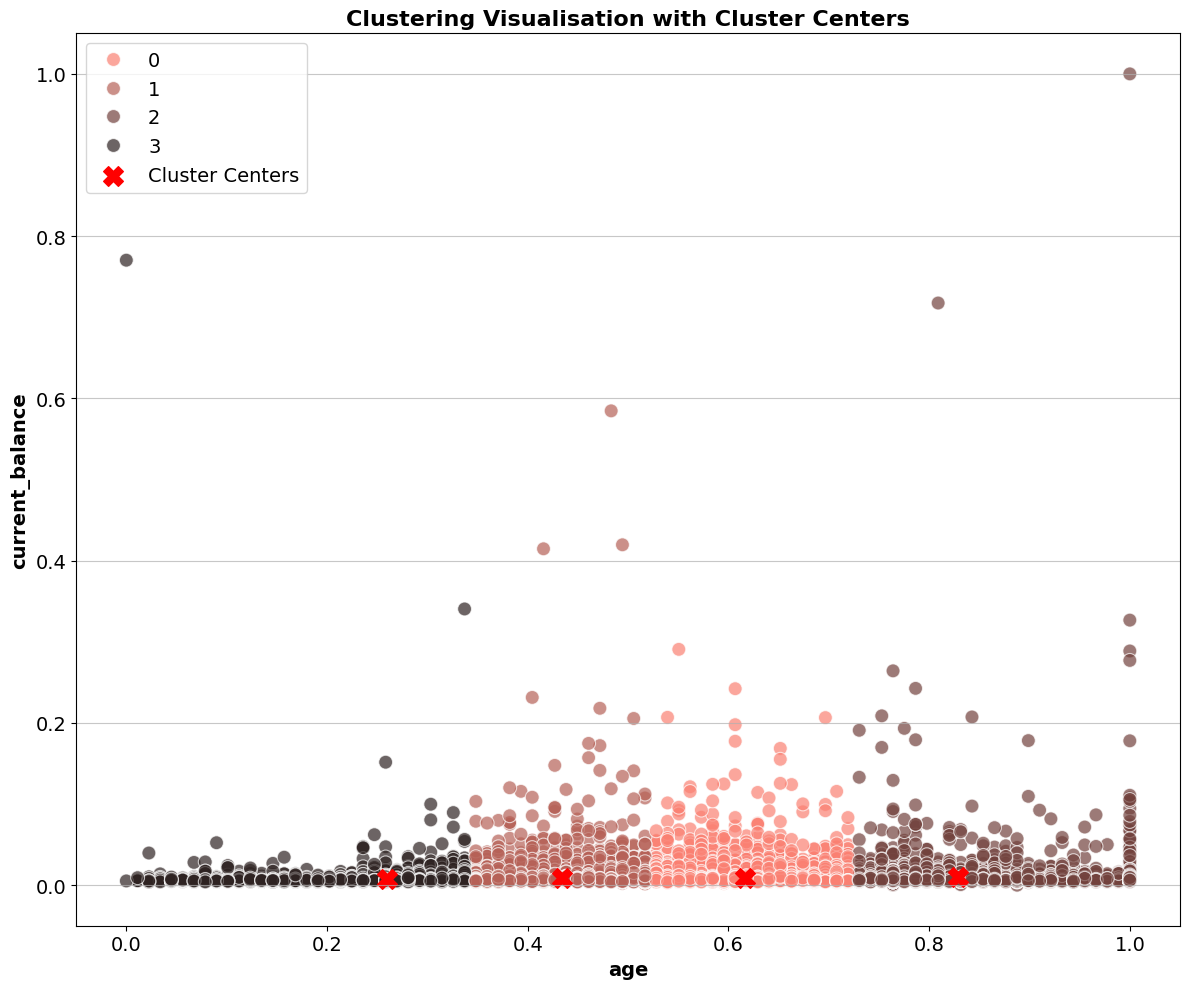

In [34]:
plot_5(cluster_churn_data, selected_col, cluster_centers)

The visualisation shows four distinct clusters of data points based on age and current balance. The cluster centres, marked by red 'x' symbols, represent the average values of age and current balance for each cluster.

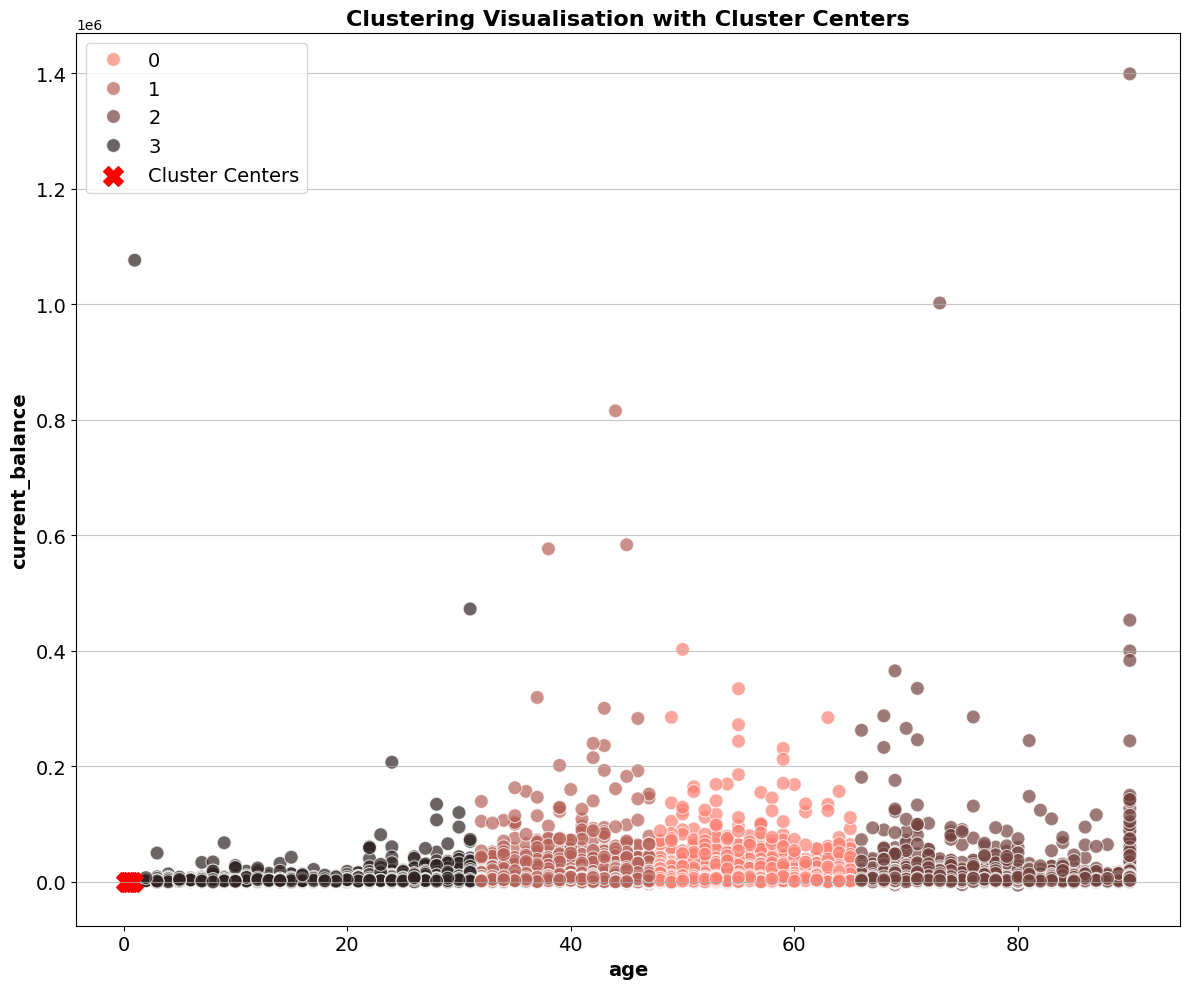

In [35]:
plot_5(cluster_data_scale_back, selected_col, cluster_centers)

### Model Fitting

In [36]:
# Seperate the columns
X = cluster_churn_data[selected_col]
y = cluster_churn_data['cluster']

In [37]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
# Make AdaBoost model
def ada_boost(X_train, y_train, X_test, y_test, n_estimators=50, random_state=42):
    # Initialise the AdaBoost model
    ada_model = AdaBoostClassifier(n_estimators=n_estimators, random_state=random_state)

    # Train the model
    ada_model.fit(X_train, y_train)

    # Make predictions on both train and test sets
    y_pred_train = ada_model.predict(X_train)
    y_pred_test = ada_model.predict(X_test)

    return ada_model, y_pred_train, y_pred_test

# Apply function
ada_model, y_pred_train, y_pred_test = ada_boost(X_train, y_train, X_test, y_test)

In [39]:
# Calculate all Score

print("AdaBoost Test Data Result")
accuracy = ada_model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred_test, average='weighted')
print(f"Precision: {precision}")

recall = recall_score(y_test, y_pred_test, average='weighted')
print(f"Recall: {recall}")

f1 = f1_score(y_test, y_pred_test, average='weighted')
print(f"F1 Score: {f1}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

AdaBoost Test Data Result
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2233
           1       1.00      1.00      1.00      2888
           2       1.00      1.00      1.00      1194
           3       1.00      1.00      1.00      1135

    accuracy                           1.00      7450
   macro avg       1.00      1.00      1.00      7450
weighted avg       1.00      1.00      1.00      7450



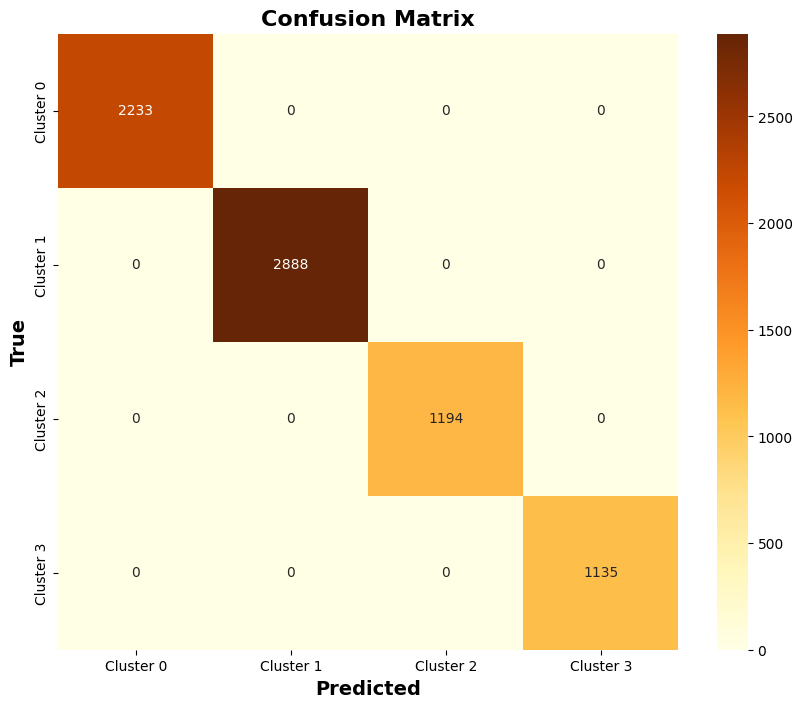

In [40]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
plot.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr', xticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'], yticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])

# Customise labels and axes
plot.title('Confusion Matrix',  fontsize=16, fontweight='bold', color='black')
plot.xlabel('Predicted',fontsize=14, fontweight='bold')
plot.ylabel('True', fontsize=14, fontweight='bold')

# Show plot
plot.show()

In [41]:
def plot_6(data, y_pred, selected_cols, title):
    """
    Plot the predicted clusters on the given data.
    """
    plot.figure(figsize=(12, 10))

    # Create a scatter plot for the predicted clusters
    sns.scatterplot(x=data[selected_cols[0]], y=data[selected_cols[1]], hue=y_pred, palette='dark:salmon_r',
                    s=100,alpha=0.7)

    # Add title and labels
    plot.title(title, fontsize=16, fontweight='bold', color='black')
    plot.xlabel(selected_cols[0], fontsize=14, color='black', fontweight='bold')
    plot.ylabel(selected_cols[1], fontsize=14, color='black', fontweight='bold')

    # Customize tick labels
    plot.xticks(fontsize=12, color='black')
    plot.yticks(fontsize=12, color='black')

    # Add legend and grid
    plot.legend(title='Predicted Clusters', fontsize=12)
    plot.grid(axis='y', alpha=0.7)
    plot.tight_layout()

    # Show plot
    plot.show()

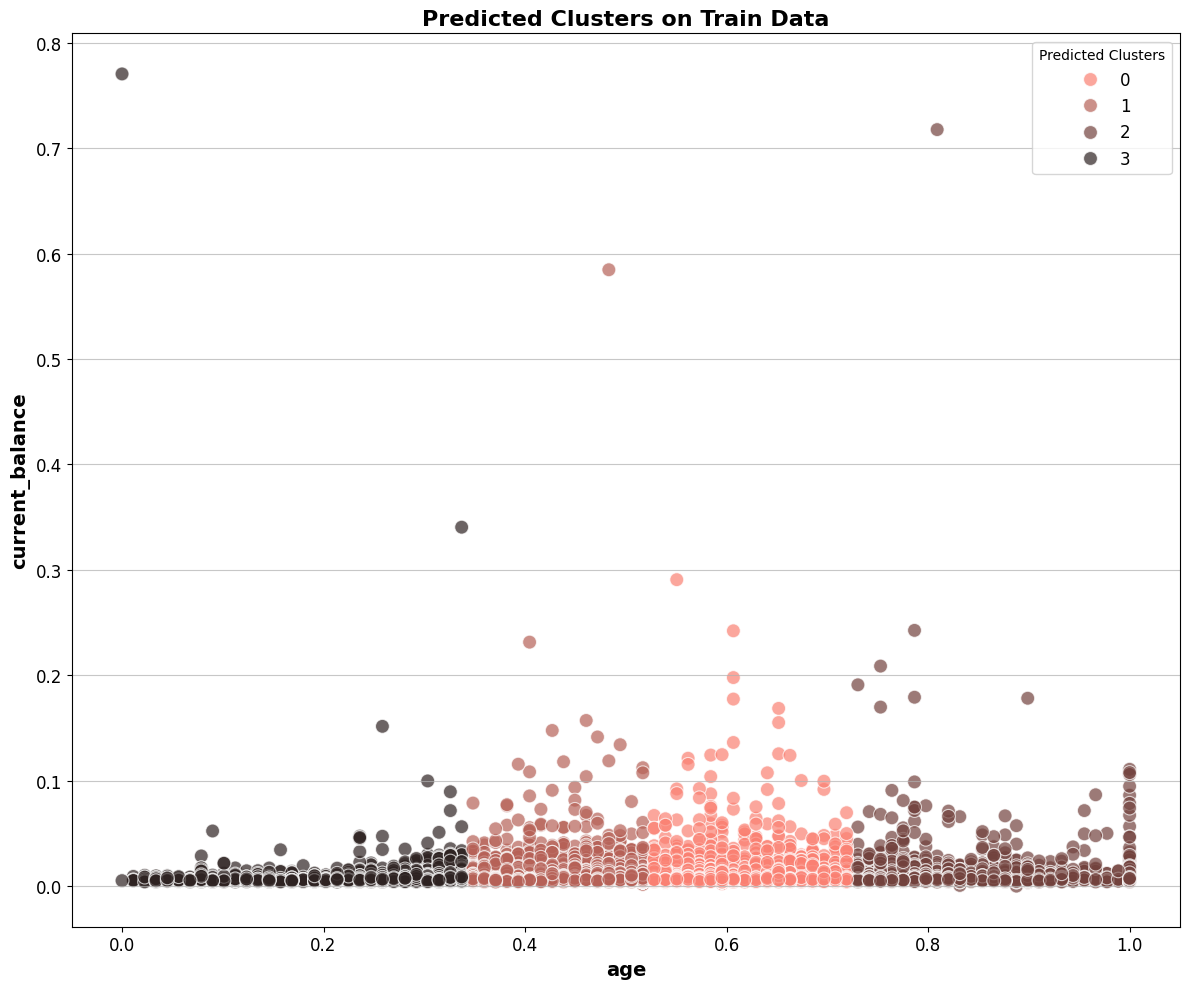

In [42]:
# Apply function
plot_6(X_train, y_pred_train, selected_col, title="Predicted Clusters on Train Data")

The plot shows four distinct clusters of data points based on age and current balance.

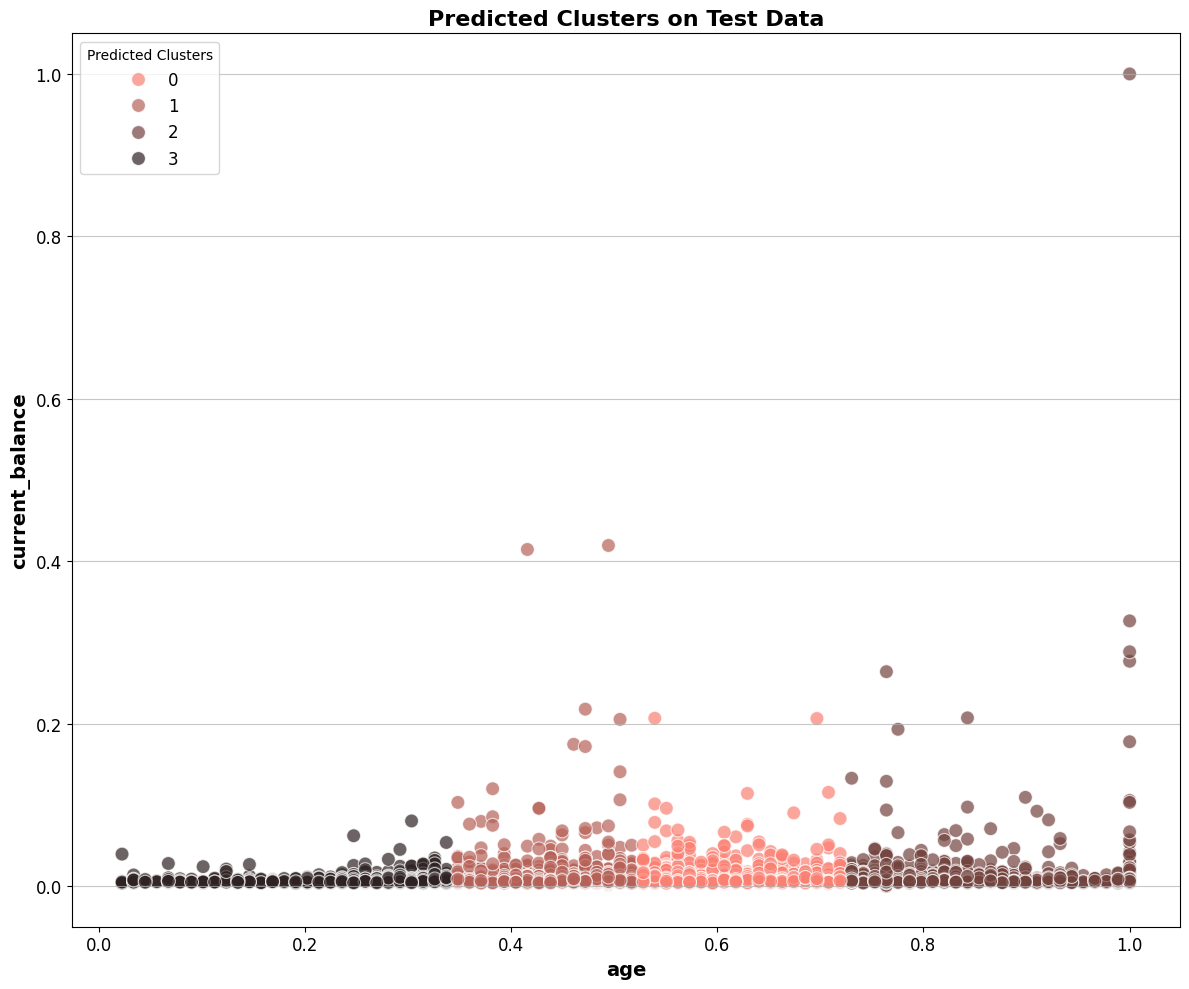

In [43]:
# Apply function
plot_6(X_test, y_pred_test, selected_col, title="Predicted Clusters on Test Data")

The plot shows four distinct clusters of data points based on age and current balance.
